# Get files from S3 to cluster

## Copy meta information files

In [1]:
s3helper.open_bucket('mas-dse-open',region='us-west-2')

info_files=s3helper.ls('Weather/Info')
Without_path=[x[13:] for x in info_files]


!mkdir /mnt/workspace/WeatherInfo

for i in range(len(info_files)-1):   # Last entry is the directory name
    _from=info_files[i]
    _to='/mnt/workspace/WeatherInfo/'+Without_path[i]
    print('From %s to %s'%(_from,_to))
    s3helper.s3_to_local(_from,_to)

From Weather/Info/README.md to /mnt/workspace/WeatherInfo/README.md
From Weather/Info/US_stations.tsv.gz to /mnt/workspace/WeatherInfo/US_stations.tsv.gz
From Weather/Info/all_stations.tsv.gz to /mnt/workspace/WeatherInfo/all_stations.tsv.gz
From Weather/Info/data-source.txt to /mnt/workspace/WeatherInfo/data-source.txt
From Weather/Info/dist2coast.txt.gz to /mnt/workspace/WeatherInfo/dist2coast.txt.gz
From Weather/Info/ghcnd-countries.txt to /mnt/workspace/WeatherInfo/ghcnd-countries.txt
From Weather/Info/ghcnd-readme.txt to /mnt/workspace/WeatherInfo/ghcnd-readme.txt
From Weather/Info/ghcnd-states.txt to /mnt/workspace/WeatherInfo/ghcnd-states.txt
From Weather/Info/ghcnd-stations_buffered.txt to /mnt/workspace/WeatherInfo/ghcnd-stations_buffered.txt
From Weather/Info/ghcnd-version.txt to /mnt/workspace/WeatherInfo/ghcnd-version.txt
From Weather/Info/stations_projections.pickle to /mnt/workspace/WeatherInfo/stations_projections.pickle


### Link to original information

Looking in README.md, you see that all of the data can be downloaded from the noaa web site.

ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ 

## Open Main data bucket

In [2]:
s3helper.open_bucket('dse-weather-west-2', region="us-west-2")
s3helper.ls('')

['.aws',
 '.bash_profile',
 '.bashrc',
 '.conda',
 '.ipython',
 '.jupyter',
 '.local',
 '.ssh',
 'ALL.csv.gz',
 'ALLBootstrap.sh',
 'MasterBootstrap.sh',
 'NY.parquet',
 'PrivateBootstrap.sh',
 'RunFromTerminal.sh',
 'US_Weather_with_smoothed.parquet',
 'US_Weather_with_smoothed.parquet_$folder$',
 'US_stations.parquet',
 'US_weather.parquet',
 'fromLocal',
 'info',
 's3helper.py',
 's3hook.sh',
 'weather.parquet']

## Move data from S3 to HDFS

In [3]:
%%time
s3helper.s3_to_hdfs("weather.parquet", "/tmp/weather.parquet")

b"20/05/14 22:58:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/_SUCCESS' for reading\n20/05/14 22:58:57 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading\n20/05/14 22:58:59 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading\n20/05/14 22:59:00 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading\n20/05/14 22:59:00 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet' for reading\n20/05/14 22:59:02 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parqu

b'Found 59 items\n-rw-r--r--   1 hadoop hadoop          0 2020-05-14 22:58 /tmp/weather.parquet/_SUCCESS\n-rw-r--r--   1 hadoop hadoop   40670401 2020-05-14 22:58 /tmp/weather.parquet/part-00000-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--   1 hadoop hadoop   40307528 2020-05-14 22:59 /tmp/weather.parquet/part-00001-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--   1 hadoop hadoop   40016618 2020-05-14 22:59 /tmp/weather.parquet/part-00002-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--   1 hadoop hadoop   40377232 2020-05-14 22:59 /tmp/weather.parquet/part-00003-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--   1 hadoop hadoop   40119938 2020-05-14 22:59 /tmp/weather.parquet/part-00004-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--   1 hadoop hadoop   40278884 2020-05-14 22:59 /tmp/weather.parquet/part-00005-6cb19187-62a0-42ad-9516-e03e05ea0c40-c000.snappy.parquet\n-rw-r--r--  

In [4]:
%%time 
s3helper.s3_to_hdfs("info/stations.parquet", "/tmp/stations.parquet")

b"20/05/14 23:00:18 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_SUCCESS' for reading\n20/05/14 23:00:18 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_common_metadata' for reading\n20/05/14 23:00:18 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/_metadata' for reading\n20/05/14 23:00:19 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00000-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading\n20/05/14 23:00:19 INFO s3n.S3NativeFileSystem: Opening 's3n://dse-weather-west-2/info/stations.parquet/part-r-00001-1fd04699-91d3-4a2a-9b36-e25c9c5f0376.gz.parquet' for reading\n"
b'Found 5 items\n-rw-r--r--   1 hadoop hadoop          0 2020-05-14 23:00 /tmp/stations.parquet/_SUCCESS\n-rw-r--r--   1 hadoop hadoop        894 2020-05-14 23:00 /tmp/stations.parquet/_common_metadata\n-rw-r--r--   1 hadoop hadoop       3107 2020-05-14

In [5]:
print(s3helper.ls_hdfs("/tmp"))

b'Found 3 items\ndrwxrwxrwx   - mapred mapred          0 2020-05-14 22:53 /tmp/hadoop-yarn\ndrwxr-xr-x   - hadoop hadoop          0 2020-05-14 23:00 /tmp/stations.parquet\ndrwxr-xr-x   - hadoop hadoop          0 2020-05-14 23:00 /tmp/weather.parquet\n'
None


## Up to here needs to be executed once each time a spark cluster is created.
The HDFS files will stay there as long as you keep the cluster on.

In [6]:
import os
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
import pyspark.sql.types as T

os.getcwd()
os.chdir("/mnt/workspace/Public-DSC291/notebooks/Section2-PCA/Full_Dataset_analysis")
os.getcwd()

from Startup import *

finished standard imports
dict_items([('spark.executor.memory', '3g'), ('spark.app.name', 'Weather_PCA'), ('spark.executor.cores', '1'), ('spark.default.parallelism', '10'), ('spark.cores.max', '4'), ('spark.logConf', 'True')])
started SparkContext and SQLContext in 15.69 seconds
loaded weather.parquet in 8.69 seconds
loaded stations.parquet in 0.18 seconds
registered dataframes as tables in 0.20 seconds


In [7]:
%%time
query1="""
SELECT stations.ID, stations.state, stations.latitude, stations.longitude,
        weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state <> '' AND weather.Measurement='PRCP'
"""

query2="""
SELECT stations.ID, stations.state, stations.latitude, stations.longitude,
        weather.Measurement, weather.Year, weather.Values
FROM stations
LEFT JOIN weather
ON stations.ID = weather.Station
WHERE stations.state <> '' AND weather.Measurement='SNOW'
"""

PRCP_df = sqlContext.sql(query1)
SNOW_df = sqlContext.sql(query2)
sqlContext.registerDataFrameAsTable(PRCP_df,'PRCP_df')
sqlContext.registerDataFrameAsTable(SNOW_df,'SNOW_df')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 146 ms


In [ ]:
query="""
SELECT stations.ID, stations.state, stations.latitude, stations.longitude,
        weatherA.Year, weatherA.Values as PRCP, weatherB.Values as SNOW
FROM stations, weather as weatherA, weather as weatherB
WHERE stations.state <> '' AND 
        stations.ID = weatherA.Station AND
        stations.ID = weatherB.Station AND
        weatherA.Year = weatherB.Year AND
        weatherA.Measurement = 'PRCP' AND
        weatherB.Measurement = 'SNOW'
"""

Weather_df = sqlContext.sql(query)
sqlContext.registerDataFrameAsTable(Weather_df, 'Weather_df')

In [ ]:
#Filter for certain dates
filter_year = 1945
Weather_df = Weather_df.filter(Weather_df.Year > filter_year)

#Filter for only stations with data in the full range
cnt_bystation = Weather_df.groupBy('ID').count()
Weather_df = Weather_df.join(cnt_bystation, "ID")
mx = cnt_bystation.agg({"count": "max"}).collect()[0]["max(count)"]
Weather_df = Weather_df.filter(Weather_df['count'] == mx)
Weather_pdf = Weather_df.toPandas()

In [ ]:
def f1(row, col):
    return row[col][:362]

def f2(row, col):
    return row[col][362:]

def Jan2Jun(df, col):
    df_first = df.copy()
    
    # df_first is same as df except for its ['Values'] column only contains the 
    # the first half year data.
    df_first['V_first'] = df_first.apply(f1, axis=1, args=[col])
    
    # subtract df_first 'Year' column by 1, because we want to join originally 1998 Jan-Jun to 1997 July-Dec,
    # as 1997 data, so minus 1998 by 1 to match 1997.
    df_first['Year'] = df_first.apply(lambda x: x['Year']-1, axis=1)
    
    # df_second is same as df except for its ['Values'] column only contains the 
    # the second half year data.
    df_second = df.copy()
    df_second['V_second'] = df_second.apply(f2, axis=1, args=[col])
    
    # drop the inrrelevant columns of df_second so that join can be easier later. I only kept 'ID' and 'Year'
    # that are used to be joined on later.
    df_second = df_second.drop(['state', 'latitude', 'SNOW', 'PRCP',
                                'longitude', 'count', col], axis=1)
    
    # join df_first and df_second on ID, Year.
    result = pd.merge(df_first, df_second, on=['ID', 'Year'], how='inner')
    
    # generate the thansformed data, e.g. 1997 July - 1998 June from 'V_second' (1997 July - 1997 Dec) and 
    # 'V_first' (1998 Jan - 1998 June)
    result[col] = result.apply(lambda x: x['V_second'] + x['V_first'], axis=1)
    
    # drop V_second and V_first as they are useless now.
    return result.drop(['V_second', 'V_first'], axis=1)

In [ ]:
New_Weather_pdf = Jan2Jun(Weather_pdf, 'PRCP')
New_Weather_pdf = Jan2Jun(New_Weather_pdf, 'SNOW')
del New_Weather_pdf['count']
PRCP = [np.nansum(unpackArray(v,np.float16)) for v in list(New_Weather_pdf['PRCP'])]
SNOW = [np.nansum(unpackArray(v,np.float16)) for v in list(New_Weather_pdf['SNOW'])]
New_Weather_pdf['PRCP'] = PRCP
New_Weather_pdf['SNOW'] = SNOW
New_Weather_pdf.sample(5)

In [ ]:
# Filter stations only in US
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
df_ElNinoYears = pd.read_csv(url + '/US_Unemployment_Oct2012.csv')
US_states = list(df_ElNinoYears['State'])
pick = [New_Weather_pdf['state'][i] in US_states for i in New_Weather_pdf.index]
New_Weather_pdf = New_Weather_pdf[pick]
In [83]:
ElNinoYears = [1951, 1957, 1965, 1968, 1972, 197

In [107]:
ElNinoYears = [1951, 1957, 1965, 1968, 1972, 1977, 1982, 1991, 1997]
data = []
row_num = 0
for station in set(New_Weather_pdf['ID']):
    row_num = row_num + 1
    temp_pdf = New_Weather_pdf[New_Weather_pdf['ID']==station]
    temp_pdf.index = range(len(temp_pdf))
    state = temp_pdf['state'][0]
    lat = temp_pdf['latitude'][0]
    lon = temp_pdf['longitude'][0]
    pick_EN = np.array([temp_pdf['Year'][i] in ElNinoYears for i in temp_pdf.index])
    PRCP_EN =temp_pdf[pick_EN]['PRCP'].mean()
    PRCP_NEN = temp_pdf[~pick_EN]['PRCP'].mean()
    SNOW_EN = temp_pdf[pick_EN]['SNOW'].mean()
    SNOW_NEN = temp_pdf[~pick_EN]['SNOW'].mean()
    data.append([row_num, station, state, lat, lon, PRCP_EN, PRCP_NEN, SNOW_EN, SNOW_NEN])
    
df = pd.DataFrame(data, columns=['row_num','station', 'state', 'latitude', 
                                 'longitude', 'PRCP_EN', 'PRCP_NEN', 
                                 'SNOW_EN', 'SNOW_NEN'])
df

,row_num,station,state,latitude,longitude,PRCP_EN,PRCP_NEN,SNOW_EN,SNOW_NEN
0,1,USC00203858,MI,42.7989,-86.2050,9580.888889,9240.842105,2322.000000,1807.631579
1,2,USC00142432,KS,37.0058,-101.8867,4662.666667,4279.368421,520.777778,415.912281
2,3,USC00362183,PA,40.1275,-79.4058,10264.888889,10431.614035,815.666667,1031.070175
3,4,USW00013957,LA,32.4506,-93.8411,12772.000000,11791.368421,22.555556,44.877193
4,5,USC00425065,UT,39.5608,-111.8653,3764.888889,3530.385965,1666.555556,1147.333333
5,6,USC00395228,SD,43.4206,-97.2567,6911.111111,5925.280702,916.222222,865.403509
6,7,USC00215563,MN,44.9342,-95.7461,6764.888889,6672.456140,1056.777778,963.105263
7,8,USC00219249,MN,44.2992,-92.6661,8153.777778,7736.070175,854.000000,890.719298
8,9,USC00104670,ID,42.7325,-114.5192,2719.444444,2559.842105,314.888889,302.298246
9,10,USC00456898,WA,46.7858,-121.7425,27140.000000,25997.263158,16774.000000,15183.701754


### DATA: Descriptives

Let’s take a look at the data!

In [65]:
df[['PRCP_EN','PRCP_NEN', 'SNOW_EN', 'SNOW_NEN']].describe()

,PRCP_EN,PRCP_NEN,SNOW_EN,SNOW_NEN
count,1036.000000,1036.000000,1036.000000,1036.000000
mean,7978.625161,7674.568465,889.412698,819.166277
std,3301.842068,3206.673850,928.531874,861.242235
min,808.777778,895.649123,0.000000,0.000000
25%,5356.111111,5230.087719,373.361111,338.710526
50%,8349.333333,7799.403509,758.444444,638.043860
75%,10090.888889,9784.789474,1123.277778,1008.263158
max,28707.555556,27003.368421,16774.000000,15183.701754


Takeaways: 
1. We have Snow and Precipitation data for 1036 stations during el-nino and non el-nino years 
2. Mean precipitation is higher during El nino years than in Non- El nino years. Similarly, there's more snow in the El nino years than in the Non el nino years. However, are these significant? We need to do a paired samples t-test to test this out. 
3. Precipitation data is more variable than snow data. 

In [66]:
from scipy import stats
import matplotlib.pyplot as plt

### Assumption Check: Outliers

First thing we need to do is import the stats library and then test the assumptions of the paired samples t-test. First let’s check for any significant outliers in each of the variables.

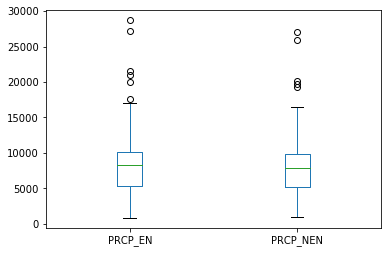

In [67]:
df[['PRCP_EN','PRCP_NEN']].plot(kind='box')
# This saves the plot as a png file
plt.show()

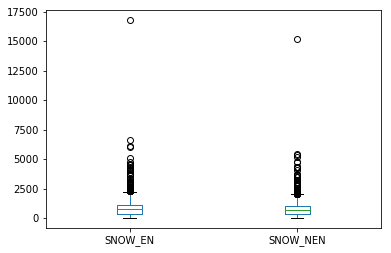

In [68]:
df[['SNOW_EN','SNOW_NEN']].plot(kind='box')
# This saves the plot as a png file
#plt.savefig('boxplot_outliers.png')
plt.show()

Takeaways: 
1. The Precipitation data has a larger range (i.e. more variable) when compared to the snow data. 
2. There are a few outliers in both precipitation data and snow. However, the outliers in the snow data seem to be more significant outliers. 

### Assumption Check: Normal Distribution

Remember that for the dependent sample T-test the normality check needs to be conducted on differences between the two scores. There are a few ways one can test this assumption – make a histogram, use a Q-Q plot, and/or use a statistical test. Let’s create a variable for the differences and run through these.

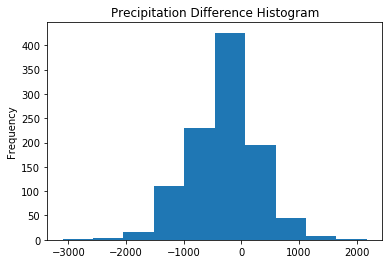

In [69]:
df['PRCP_DIFF'] = df['PRCP_NEN'] - df['PRCP_EN']

df['PRCP_DIFF'].plot(kind='hist', title= 'Precipitation Difference Histogram')
plt.show()

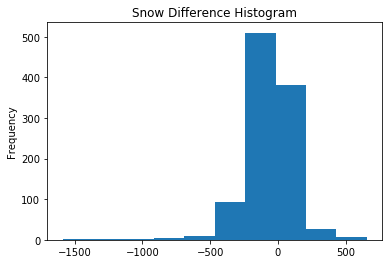

In [70]:
df['SNOW_DIFF'] = df['SNOW_NEN'] - df['SNOW_EN']

df['SNOW_DIFF'].plot(kind='hist', title= 'Snow Difference Histogram')
plt.show()

Takeaways: 
1. Precipitation data seems to be normally distributed. 
2. Snow data is positively skewed, not normally distributed. 

### Q-Q plot 

Another way to check for normally distributed data is to use a Q-Q plot. If you’re unfamiliar with how to read a Q-Q plot, the data should be on the red line. If it’s not, then it suggests that the data may not be normally distributed.

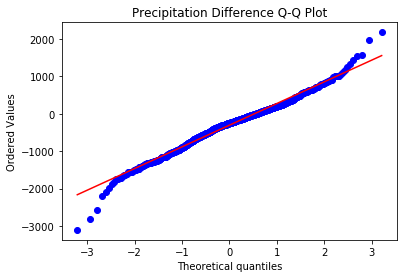

In [71]:
stats.probplot(df['PRCP_DIFF'], plot= plt)
plt.title('Precipitation Difference Q-Q Plot')

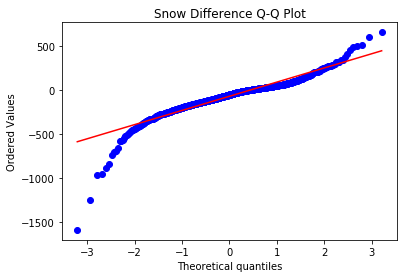

In [72]:
stats.probplot(df['SNOW_DIFF'], plot= plt)
plt.title('Snow Difference Q-Q Plot')

There is some deviation from normality, but it does not appear to be severe so there is no need to worry. To be sure, let’s test this statistically to see if the data is normally distributed. To test this, one can use the Shapiro-Wilk test for normality. Unfortunately the output is not labeled. The first value is the W test value, and the second value it the p-value.

In [73]:
stats.shapiro(df['PRCP_DIFF'])

(0.9840223789215088, 3.137212711834536e-09)

In [74]:
stats.shapiro(df['SNOW_DIFF'])

(0.8900324702262878, 1.602889554806485e-26)

The test was non-significant. Therefore, the difference between the two conditions is normally distributed. If this test were to be significant, an appropriate alternative to use would be the Wilcoxon signed-rank Test.

## Paired Samples T-Test

In [75]:
stats.ttest_rel(df['PRCP_EN'], df['PRCP_NEN'])

Ttest_relResult(statistic=16.77867955867935, pvalue=4.5187402770054652e-56)

### Interpretation of the Results

A paired sample t-test was used to analyze the precipitation in el nino years and in non el nino years to test if the el nino had a significant affect on the precipitation. The precipitation in el nino years was higher (7978.62 ± 3301.84 units) compared to the precipitation in non el nino years (7674.57 ± 3206.67 units). However, this was not a statistically significant difference at p$<0.05$ for the entire US. 

In [76]:
stats.ttest_rel(df['SNOW_EN'], df['SNOW_NEN'])

Ttest_relResult(statistic=13.232045374531031, pvalue=4.8500165799108326e-37)

### Interpretation of the Results

A paired sample t-test was used to analyze the snow fall in el nino years and in non el nino years to test if the el nino had a significant affect on the precipitation. The snow fall in el nino years was higher (889.41 ± 928.53 units) compared to the precipitation in non el nino years (819.17 ± 861.24 units). However, this was not a statistically significant difference at p$<0.05$ for the entire US. 

## Comparing Precipitation and Snow Fall at the Station level 

In [120]:
#for station in set(df['station']):
#    PRCP_Test = [stats.ttest_rel(df['PRCP_EN'], df['PRCP_NEN']) for v,w in list(df['PRCP_EN'], df['PRCP_EN'])]
#    #SNOW_Test = stats.ttest_rel(df['SNOW_EN'], df['SNOW_NEN'])
#    print("Station: ", station, "PRCP_Test", PRCP_Test)

In [125]:
data = []
for station in set(df['station']):
    state = df['state'][0]
    lat = df['latitude'][0]
    lon = df['longitude'][0]
    PRCP_EN = df['PRCP_EN'][0]
    PRCP_NEN = df['PRCP_NEN'][0]
    #PRCP_DIFF = df['PRCP_NEN'] - df['PRCP_EN']
    PRCP_Test = stats.ttest_rel(df['PRCP_EN'][0], df['PRCP_NEN'][0])
    SNOW_EN = df['SNOW_EN'][0]
    SNOW_NEN = df['SNOW_NEN'][0]
    #SNOW_DIFF = df['SNOW_NEN'] - df['SNOW_EN']
    SNOW_Test = stats.ttest_rel(df['SNOW_EN'][0], df['SNOW_NEN'][0])
    #print("Station: ", station, "PRCP_Test", PRCP_Test, "SNOW_Test", SNOW_Test)
    data.append([station, state, lat, lon, PRCP_EN, PRCP_NEN, PRCP_Test, SNOW_EN, SNOW_NEN, SNOW_Test])

tests_df = pd.DataFrame(data, columns=['station', 'state', 'lat', 'lon', 'PRCP_EN', 'PRCP_NEN', 'PRCP_Test', 'SNOW_EN', 'SNOW_NEN', 'SNOW_Test'])
tests_df

/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/mnt/anaconda/envs/ipykernel_py34/lib/python3.4/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,station,state,lat,lon,PRCP_EN,PRCP_NEN,PRCP_Test,SNOW_EN,SNOW_NEN,SNOW_Test
0,USC00203858,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
1,USC00142432,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
2,USC00362183,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
3,USW00013957,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
4,USC00425065,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
5,USC00395228,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
6,USC00215563,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
7,USC00219249,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
8,USC00104670,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"
9,USC00456898,MI,42.7989,-86.205,9580.888889,9240.842105,"(nan, nan)",2322.0,1807.631579,"(nan, nan)"


### Are there any significant differences at the State level?

In [86]:
for state in set(df['state']):
    s = df[['PRCP_EN','PRCP_NEN', 'SNOW_EN', 'SNOW_NEN']].describe()
    print(state, s)    

CA             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75%    10090.888889   9784.789474   1123.277778   1008.263158
max    28707.555556  27003.368421  16774.000000  15183.701754
UT             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75

MI             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75%    10090.888889   9784.789474   1123.277778   1008.263158
max    28707.555556  27003.368421  16774.000000  15183.701754
NH             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75

CO             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75%    10090.888889   9784.789474   1123.277778   1008.263158
max    28707.555556  27003.368421  16774.000000  15183.701754
CT             PRCP_EN      PRCP_NEN       SNOW_EN      SNOW_NEN
count   1036.000000   1036.000000   1036.000000   1036.000000
mean    7978.625161   7674.568465    889.412698    819.166277
std     3301.842068   3206.673850    928.531874    861.242235
min      808.777778    895.649123      0.000000      0.000000
25%     5356.111111   5230.087719    373.361111    338.710526
50%     8349.333333   7799.403509    758.444444    638.043860
75

In [ ]:
for state in set(df['state']):
    
    s = df[['PRCP_EN','PRCP_NEN', 'SNOW_EN', 'SNOW_NEN']].describe()
    print(state, s)    

In [94]:
#Check for outliers
#for state in set(df['state']):
#    print(state) 
#   df[['PRCP_EN','PRCP_NEN']].plot(kind='box')

In [95]:
#Check for outliers
#for state in set(df['state']):
#    print(state) 
#    df[['SNOW_EN','SNOW_NEN']].plot(kind='box')

In [84]:
data = []
for state in set(df['state']):
    lat = df['latitude'][0]
    lon = df['longitude'][0]
    PRCP_EN = df['PRCP_EN'][0]
    PRCP_NEN = df['PRCP_NEN'][0]
    PRCP_Test = stats.ttest_rel(df['PRCP_EN'], df['PRCP_NEN'])
    SNOW_EN = df['SNOW_EN'][0]
    SNOW_NEN = df['SNOW_NEN'][0]
    SNOW_Test = stats.ttest_rel(df['SNOW_EN'], df['SNOW_NEN'])
    #print("Station: ", station, "PRCP_Test", PRCP_Test, "SNOW_Test", SNOW_Test)
    data.append([state, lat, lon, PRCP_EN, PRCP_NEN, PRCP_Test, SNOW_EN, SNOW_NEN, SNOW_Test])

tests_df = pd.DataFrame(data, columns=['state', 'lat', 'lon', 'PRCP_EN', 'PRCP_NEN', 'PRCP_Test', 'SNOW_EN', 'SNOW_NEN','SNOW_Test'])
tests_df

,state,lat,lon,PRCP_EN,PRCP_NEN,PRCP_Test,SNOW_EN,SNOW_NEN,SNOW_Test
0,CA,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
1,UT,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
2,WA,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
3,IA,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
4,TN,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
5,SD,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
6,MO,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
7,ND,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
8,TX,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
9,NM,42.7989,-86.205,9580.888889,9240.842105,"(16.7786795587, 4.51874027701e-56)",2322.0,1807.631579,"(13.2320453745, 4.85001657991e-37)"
